## Multilayered Perceptron

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Target:** Implement multi-layer perceptron and analyze the results

**Data:**  The dataset (points2d.dat). The sample includes 400 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

- Report how you split the sample for training and test. Report how you designed your neural network to solve this 3-class problem.(number of layers, error function etc.)
- Derive weight update equations using hyperbolic tangent activation function for hidden layers and sigmoid activation function for output layer . Submit a hard-copy of this derivation, drawing the the corresponding neural network with hidden units. All the formulas and the corresponding symbols should be clear. 
- Implement multi-layer perceptron with 5 hidden units. While training at each iteration, plot the error on training and test sets.
- After training converges: Plot the validation/test set and show true positives, true negatives,false positives, and false negatives (with different markers, colors, etc.)

![](https://user-images.githubusercontent.com/23139429/57980988-ce56d600-7a3a-11e9-91b2-d203b3d210bd.jpg)

In [0]:
np.random.seed(100) 
# Read input data
file = open('points2d.dat', 'r')
data = np.array([])
labels = []
for line in file:
    words = line.split()
    data = np.concatenate((data, list(map(float, words[:2]))), axis=0)
    labels.append(int(words[2]))
data = np.reshape(data, (int(len(data) / 2), 2))

In [0]:
"""
I split the data in the following cell to test and training:
%70 Training 
%30 Test
"""
x_train = np.asarray([[data[i, 0], data[i, 1]] for i in range(int(len(data) * 0.7))])
x_train = x_train.T
labels_train = labels[:int(len(labels) * 0.7)]

x_test = np.asarray([[data[i, 0], data[i, 1]] for i in range(int(len(data) * 0.7), len(data))])
x_test = x_test.T
labels_test = labels[int(len(labels) * 0.7):]

# There are 3 classes so I use one hot encoded labels
one_hot_labels_train = np.zeros((3, len(labels_train)))
one_hot_labels_test = np.zeros((3, len(labels_test)))

for i in range(len(labels_train)):
    one_hot_labels_train[labels_train[i], i] = 1

for i in range(len(labels_test)):
    one_hot_labels_test[labels_test[i], i] = 1

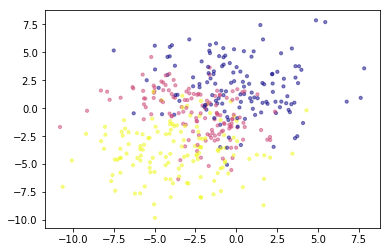

In [0]:
# Input data
plt.scatter(data[:,0], data[:,1], c=labels, cmap='plasma', s=10, alpha=0.5)  
plt.show()


In [0]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid (x))

def tanh_der(x):
  return 1.0 - np.tanh(x)**2 


In [0]:
epochs = 100

# Randomly initialize weights and bias
w = np.random.rand(5, 2)
b = np.random.rand(5, 1)

w_o = np.random.rand(3, 5)
b_o = np.random.rand(3, 1)

error = []
val_error = []

alpha = 0.001 # Learning rate 

for epoch in range(epochs):
    # Forward Propagation
    z = np.dot(w, x_train) + b
    a = np.tanh(z)
    z_o = np.dot(w_o, a) + b_o
    y = sigmoid(z_o)

    # Backward Propagation
    dz_o = -1 * np.divide(one_hot_labels_train, y) * sigmoid_der(z_o)
    dw_o = np.dot(dz_o, a.T)
    db_o = np.sum(dz_o, axis=1, keepdims=True)
    dz = np.dot(w_o.T, dz_o) * tanh_der(z)
    dw = np.dot(dz, x_train.T)
    db = np.sum(dz, axis=1, keepdims=True)

    # Update Weights
    w = w - alpha * dw
    b = b - alpha * db
    w_o = w_o - alpha * dw_o
    b_o = b_o - alpha * db_o

    # Exponential learning rate decay
    alpha = alpha * (0.95 ** epoch)

    # Train Error
    loss = np.sum(-1.0 * one_hot_labels_train * np.log(y))  # Cross-Entropy Loss Function
    error.append(loss)

    # Validation Error
    y_val = sigmoid(np.dot(w_o, np.tanh(np.dot(w, x_test) + b)) + b_o)
    val_loss = np.sum(-1.0 * one_hot_labels_test * np.log(y_val))
    val_error.append(loss)

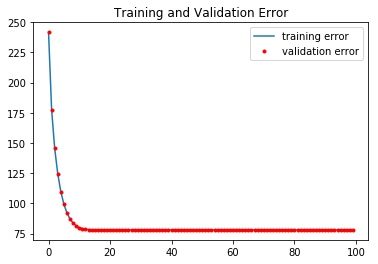

In [0]:
# Plot Training and Test Error at each iteration
ax = plt.subplot(1, 1, 1)
ax.plot(range(epochs), error, label='training error')
ax.plot(range(epochs), val_error, 'r.', label='validation error')
plt.title('Training and Validation Error')
ax.legend()
plt.show()

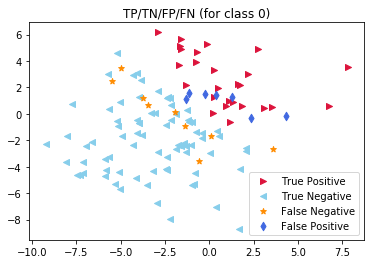

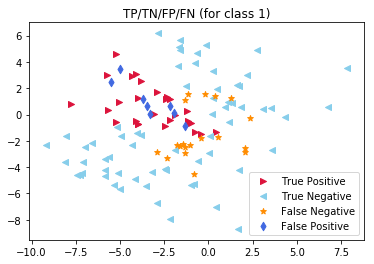

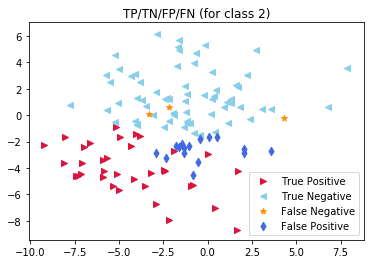

In [0]:
"""
Calculate true positives, true negatives, false positives and false negatives.
I don't understand how to calculate these for multi-class problem. So, I choose 
a class as positive and the others as negative and plot this for each class.
"""
y_test = sigmoid(np.dot(w_o, np.tanh(np.dot(w, x_test) + b)) + b_o)
predicted_labels = []
for i in range(len(y_test.T)):
    temp = y_test.T[i]
    temp_class = np.argmax(temp)
    predicted_labels.append(temp_class)


def plotTP_TN_FP_FN(label):
    true_positives = []
    true_negatives = []
    false_positives = []
    false_negatives = []

    for i in range(len(y_test.T)):
        temp = y_test.T[i]
        temp_class = np.argmax(temp)
        if temp_class == labels_test[i]:
            if temp_class == label:
                true_positives.append(x_test.T[i])
            else:
                true_negatives.append(x_test.T[i])
        elif labels_test[i] == label:
            false_negatives.append(x_test.T[i])
        elif temp_class == label:
            false_positives.append(x_test.T[i])
        else:
            true_negatives.append(x_test.T[i])

    true_negatives = np.asarray(true_negatives)
    true_positives = np.asarray(true_positives)
    false_positives = np.asarray(false_positives)
    false_negatives = np.asarray(false_negatives)
    
# Plot true positives, true negatives, false positives and false negatives
    plt.figure()
    ax = plt.subplot(1, 1, 1)
    ax.scatter(true_positives[:, 0], true_positives[:, 1], c='crimson', marker='>', label='True Positive')
    ax.scatter(true_negatives[:, 0], true_negatives[:, 1], c='skyblue', marker='<', label='True Negative')
    ax.scatter(false_negatives[:, 0], false_negatives[:, 1], c='darkorange', marker='*', label='False Negative')
    ax.scatter(false_positives[:, 0], false_positives[:, 1], c='royalblue', marker='d', label='False Positive')
    ax.legend()
    plt.title('TP/TN/FP/FN (for class %d)' % label)
    plt.show()
    

plotTP_TN_FP_FN(0)
plotTP_TN_FP_FN(1)
plotTP_TN_FP_FN(2)


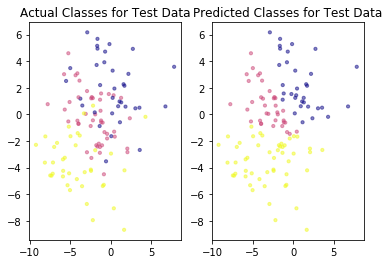

In [0]:
# Plot Predicted and actual classes
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(x_test[0], x_test[1], c=labels_test, cmap='plasma', s=10, alpha=0.5)
plt.title('Actual Classes for Test Data')
plt.subplot(1, 2, 2)
plt.scatter(x_test[0], x_test[1], c=predicted_labels, cmap='plasma', s=10, alpha=0.5)
plt.title('Predicted Classes for Test Data')
plt.show()

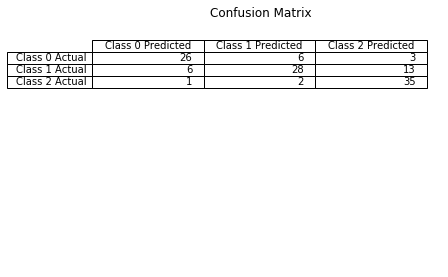

In [0]:
# Print Confusion Matrix
conf_matrix = np.array([[0,0,0], [0,0,0], [0,0,0]])
for i in range(len(labels_test)):
  conf_matrix[labels_test[i]][predicted_labels[i]] += 1

col = ['Class 0 Predicted', 'Class 1 Predicted', 'Class 2 Predicted']
row = ['Class 0 Actual', 'Class 1 Actual', 'Class 2 Actual']

fig = plt.figure()
fig.suptitle('Confusion Matrix')

axs = plt.subplot()
plt.table(cellText=conf_matrix,
                      rowLabels=row,
                      colLabels=col,
                      loc='best')
axs.axis('off')
plt.show()
